<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-01-02 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       243 non-null    float64
 1   Low        243 non-null    float64
 2   Open       243 non-null    float64
 3   Close      243 non-null    float64
 4   Volume     243 non-null    float64
 5   Adj Close  243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB
None


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from c

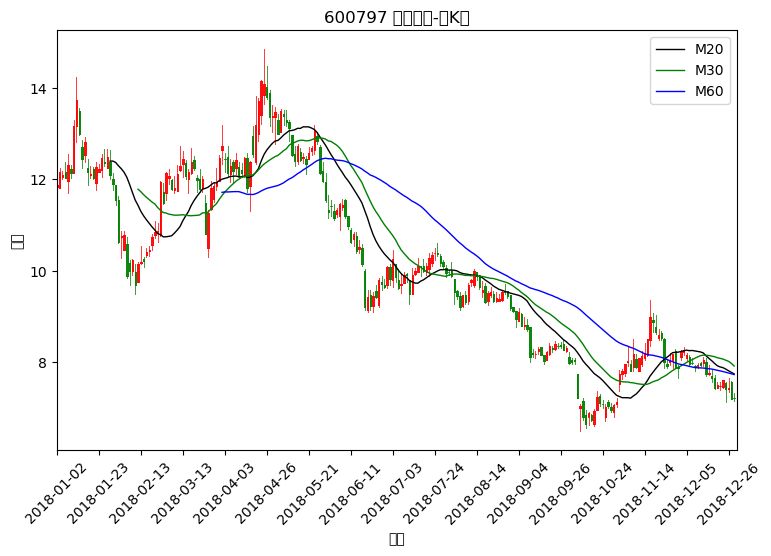

In [10]:
import datetime

import pandas_datareader.data as web

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
print(df_stockload.info())

# 替换 import matplotlib.finance as mpf 画k线图
import mpl_finance as mpf  # 替换 import matplotlib.finance as mpf

import matplotlib.pyplot as plt

# 创建fig对象
fig = plt.figure(figsize=(8, 6), dpi=100, facecolor="white")

# 设置图像边框
fig.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)

# 创建子图
graph_KAV = fig.add_subplot(1, 1, 1)

# 画k线
mpf.candlestick2_ochl(graph_KAV, df_stockload.Open, df_stockload.Close, df_stockload.High, df_stockload.Low, width=0.5,
                      colorup='r', colordown='g')  # 绘制K线走势

"""
# 另一种绘制K线方法candlestick_ochl(ax, quotes, width=0.2, colorup='r', colordown='g', alpha=1.0)的主要参数如下：
# ax 是绘制图形的 axis 对象；quotes是所有的股票数据序列，其中每一行都是按照开盘价、收盘价、最高价、最低价的顺序排列。
# 使用candlestick_ochl()方法时需要额外用zip方法生成指定要求的股票数据列表，如下所示：

剩下的工作就是对图表显示效果的设置，


ohlc = list(zip(np.arange(0,len(df_stockload.index)),df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low))#使用zip方法生成数据列表 

mpf.candlestick_ochl(graph_KAV, ohlc, width=0.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势
"""

# 绘制移动平均线图
# pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()

# pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()

# pd.rolling_mean(df_stockload.Close,window=60)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()

import numpy as np

# 绘制到图上面
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma20'], 'black', label='M20', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma30'], 'green', label='M30', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma60'], 'blue', label='M60', lw=1.0)

# 图像设置

# 添加图例
graph_KAV.legend(loc='best')

graph_KAV.set_title(u"600797 浙大网新-日K线")
graph_KAV.set_xlabel("日期")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0, len(df_stockload.index))  # 设置一下x轴的范围
graph_KAV.set_xticks(range(0, len(df_stockload.index), 15))  # X轴刻度设定 每15天标一个日期
graph_KAV.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KAV.get_xticks()])  # 标签设置为日期

# X-轴每个ticker标签都向右倾斜45度
for label in graph_KAV.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)  # 设置标签字体
plt.show()